In [1]:
import sys
#import os
import math
#import logging
import galsim
import matplotlib.pyplot as plt
import h5py
import numpy as np 
import random 
#import torch 
import copy 

np.set_printoptions(threshold=sys.maxsize)





In [2]:
size=10
img_ = np.zeros((size,64,64))
img_nonoise_ = np.zeros((size,64,64))
img_2_ = np.zeros((size,64,64))
gal_flux_ = np.zeros(size)
bulge_re_ =np.zeros(size)
bulge_n_ =np.zeros(size)
gal_q_ = np.zeros(size)
gal_beta_ = np.zeros(size)
psf_ =  np.zeros(size)
snr_ =  np.zeros(size)
sigma_=  np.zeros(size)
g_1_= np.zeros(size)
g_2_= np.zeros(size)

In [3]:
for i in range(size): 

# fixed parameters 
    image_size = 64        # n x n pixels
    pixel_scale = 0.23     # arcsec / pixel
    random_seed = 1314662
    rng = galsim.BaseDeviate(random_seed+1)
    psf_beta = 2       #moffat parameter 
    
    
#parameter random generations  
    psf_re=random.uniform(0.5,1)         # PSF moffat scale radius in arcsec 
    bulge_re = random.uniform(0.1,0.6)         # sersic radius, unit arcsec
    bulge_n = random.uniform(0.5,6)        # sersic index 

    # q is ellipticity and beta is orientation. 
    #You could directly predict q and beta but there would be a discontiniuty issue for beta. A jump from 180 degree to 1 degree. 
    # radial sampling for g1 and g2 -reduced shear -> ellipticiy and orientation 
    A= random.uniform(0,0.67)    # gal_q =b/a will ranges in (0.2,1) & A=1-q / 1+q 
    gal_q=(1- A ) /(1+ A ) 
    gal_beta = random.uniform(0,3.14)        #  radians     
    g_1=A *np.cos(2*gal_beta)
    g_2=A *np.sin(2*gal_beta)
    
    
    
    noise= random.randint(200,400)
    gal_flux = 1e5* random.uniform(.3,4)
    
    gal = galsim.Sersic(bulge_n, half_light_radius=bulge_re)
    gal = gal.withFlux(gal_flux )
    gal = gal.shear(g1=g_1,g2=g_2)
    psf = galsim.Moffat(beta=psf_beta, flux=1., fwhm=psf_re)   
    final = galsim.Convolve([psf, gal])
    image = galsim.ImageF(image_size, image_size,scale=pixel_scale)
    final.drawImage(image=image);
    image_nonoise = copy.deepcopy(image.array)
    snr=np.sqrt((image.array**2).sum())/noise #signal to noise ratio, after generating data, choose data with snr [10,100]
    
    

    image.addNoise(galsim.PoissonNoise(sky_level=0.))   
    noisemap = np.random.normal(0, noise, 64*64)  #noise map for bkgr gaussian noise 
    noisemap=noisemap.reshape((64,64))
    img_fv = image.array+noisemap   #you can also use add noise to add gaussian noise by using 'image.addNoise(galsim.GaussianNoise(sigma=noise)) ' 
    
    final_2 = psf 
    image_2 = galsim.ImageF(image_size, image_size,scale=pixel_scale)
    final_2.drawImage(image=image_2) 


    img_[i]= img_fv # final noised image 
    img_2_[i]= image_2.array  # psf 
    img_nonoise_[i]=image_nonoise  # noiseless image 
    gal_flux_[i] = gal_flux
    bulge_re_[i] =bulge_re
    bulge_n_[i] =bulge_n
    gal_q_[i] =gal_q
    gal_beta_[i] = gal_beta
    psf_[i]=psf_re
    snr_[i]=snr
    sigma_[i]=noise
    g_1_[i]=g_1
    g_2_[i]=g_2
  

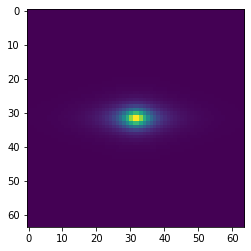

In [4]:
plt.imshow(img_nonoise_[1]) # image without noise 

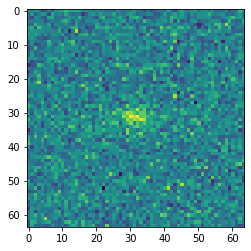

In [5]:
plt.imshow(img_[1])  # final image 

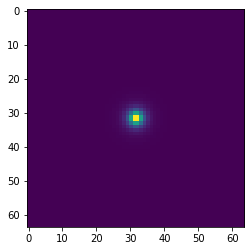

In [6]:
plt.imshow(img_2_[1] )  # PSF